In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
h18 = pd.read_csv('2018.csv', on_bad_lines='skip')
h18 = h18.rename(columns={
    'GDP per capita': 'Economy (GDP per Capita)',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Country or region': 'Country',
    'Score' : 'Happiness Score'
})
region_df = pd.read_csv('2016.csv')
h18['Country'] = h18['Country'].str.strip()
region_df['Country'] = region_df['Country'].str.strip()
h18 = pd.merge(h18, region_df[['Country', 'Region']], on='Country', how='left')
h18 = h18.round(2)
h18.head()

Overall rank      Country  Happiness Score  Economy (GDP per Capita)  \
0             1      Finland             7.63                      1.30   
1             2       Norway             7.59                      1.46   
2             3      Denmark             7.56                      1.35   
3             4      Iceland             7.50                      1.34   
4             5  Switzerland             7.49                      1.42   

   Social support  Health (Life Expectancy)  Freedom  Generosity  \
0            1.59                      0.87     0.68        0.20   
1            1.58                      0.86     0.69        0.29   
2            1.59                      0.87     0.68        0.28   
3            1.64                      0.91     0.68        0.35   
4            1.55                      0.93     0.66        0.26   

   Perceptions of corruption          Region  
0                       0.39  Western Europe  
1                       0.34  Western Europe  
2                       0.41  Western Europe  
3                       0.14  Western Europe  
4                       0.36  Western Europe

- Average of happiness score 

In [46]:
happiness = h18['Happiness Score'].mean()
print(happiness)

5.375641025641026


1- The repeat size of each region

C:\Users\User\AppData\Local\Temp\ipykernel_20636\799708922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


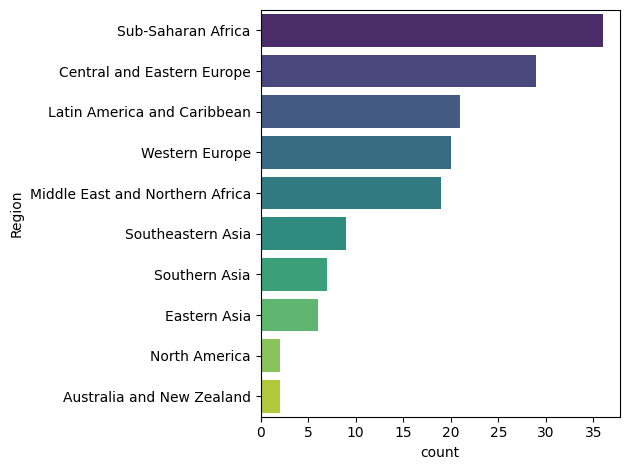

In [15]:
region = h18['Region'].value_counts().reset_index()
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.tight_layout()
plt.show()

2- Top Regions with Happiness Score > 5.3 in 2018

C:\Users\User\AppData\Local\Temp\ipykernel_20636\3464565425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


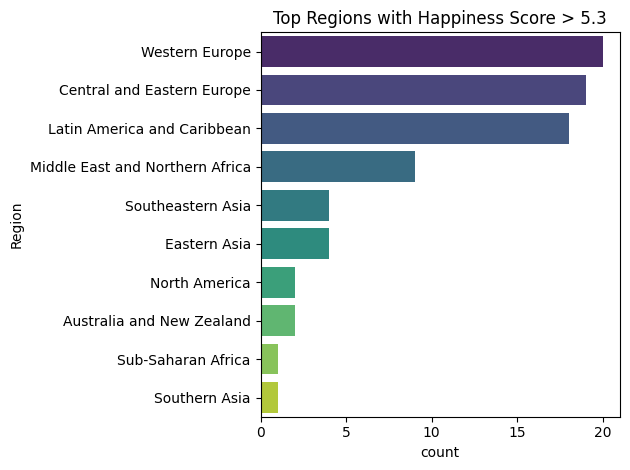

In [16]:
filtered = h18[h18['Happiness Score'] > 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.title('Top Regions with Happiness Score > 5.3')
plt.tight_layout()
plt.show()

3- Top Regions with Happiness Score < 5.3 in 2018

C:\Users\User\AppData\Local\Temp\ipykernel_20636\2733400668.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')


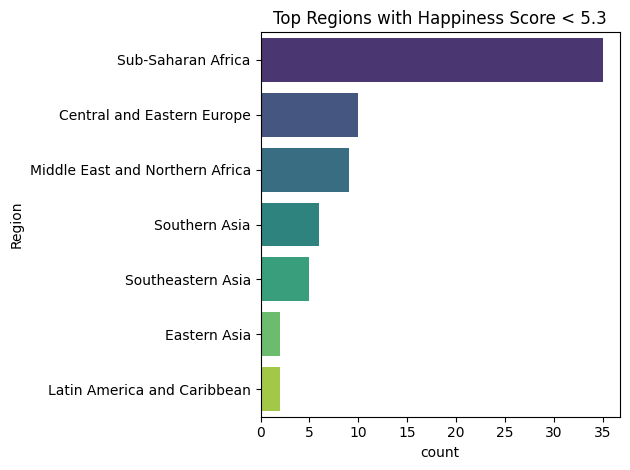

In [12]:
filtered = h18[h18['Happiness Score'] < 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')
plt.title('Top Regions with Happiness Score < 5.3')
plt.tight_layout()
plt.show()

4- Comparison of average scores by category for all regions

C:\Users\User\AppData\Local\Temp\ipykernel_20636\2891355312.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


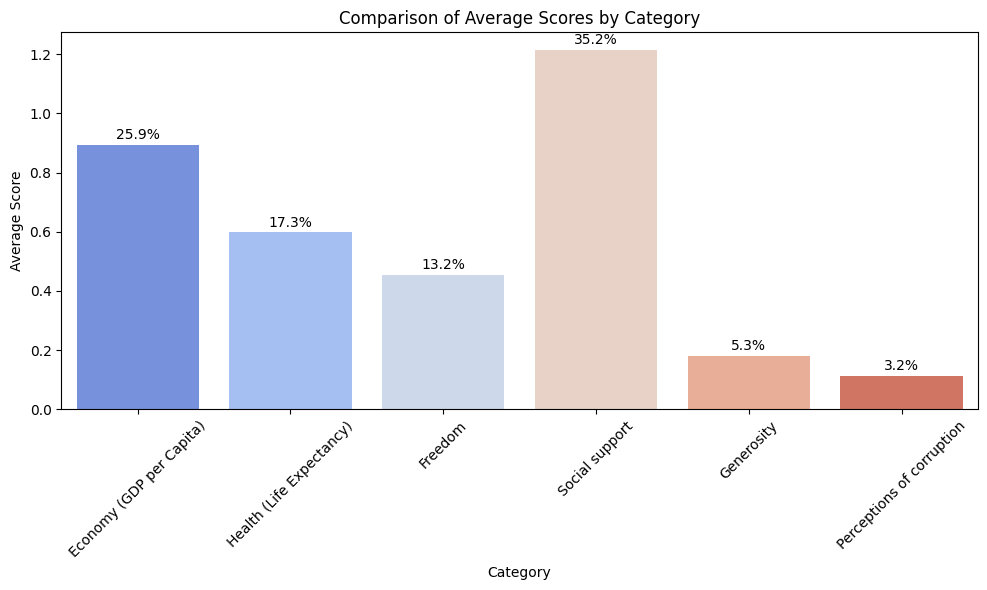

In [18]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
averages = h18[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Comparison of Average Scores by Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5- Comparison of average scores by category for all regions with a happiness score greater than 5.3

In [19]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
high_score = h18[h18['Happiness Score'] > 5.3]
averages = high_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score > 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20636\2410968502.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


6- Comparison of average scores by category for all areas with a happiness score less than or equal to 5.3

C:\Users\User\AppData\Local\Temp\ipykernel_20636\1929359988.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


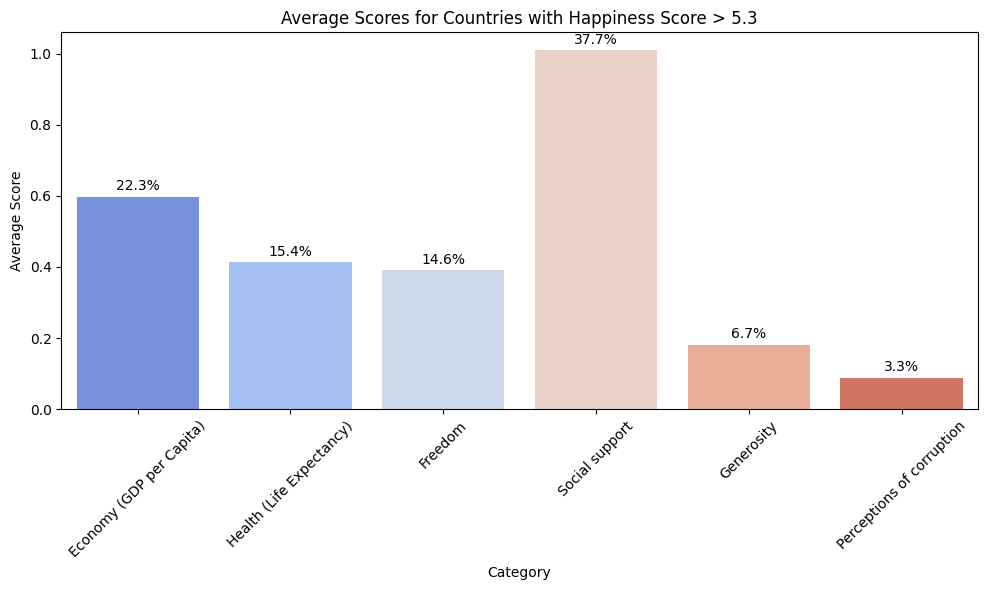

In [20]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
high_score = h18[h18['Happiness Score'] <= 5.3]
averages = high_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score > 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7- Average Indicators for Latin America and Caribbean Region

C:\Users\User\AppData\Local\Temp\ipykernel_20636\4239975719.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


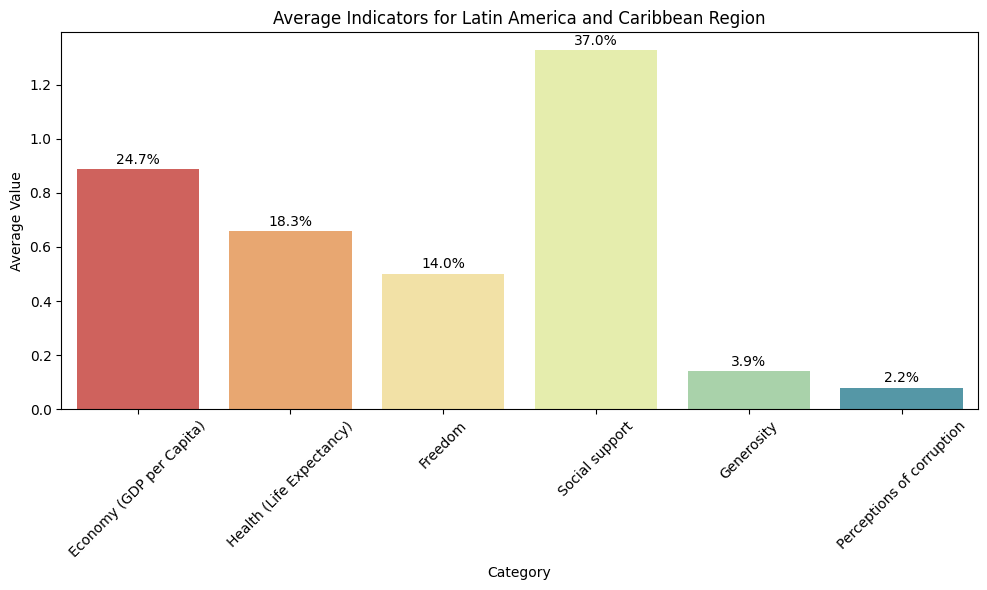

In [17]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Latin America and Caribbean']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Latin America and Caribbean Region')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8- Average Indicators for Western Europe

C:\Users\User\AppData\Local\Temp\ipykernel_20636\2228266183.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


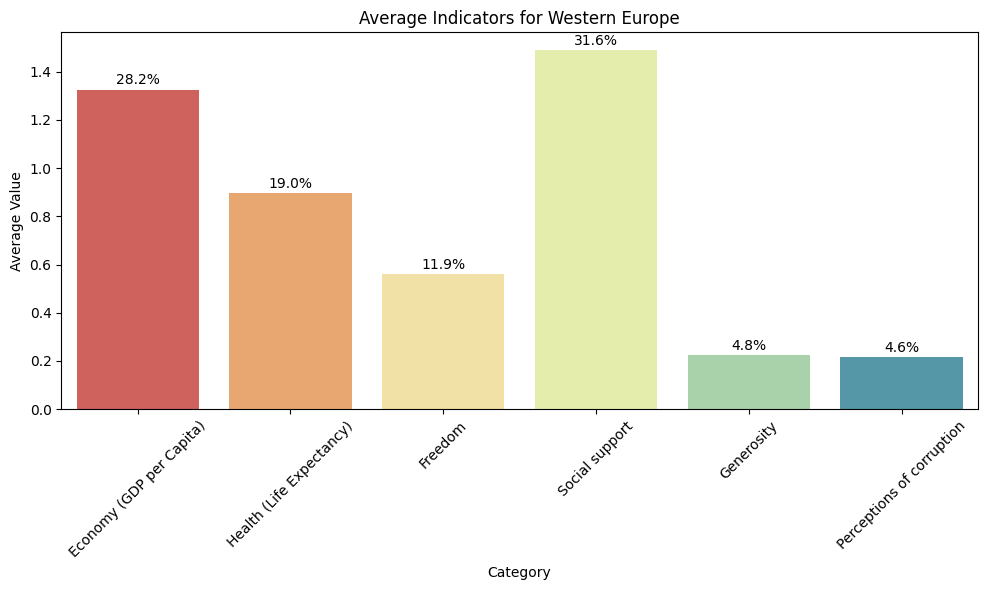

In [21]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Western Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Western Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9- Average Indicators for Eastern Europe

C:\Users\User\AppData\Local\Temp\ipykernel_20636\1007533509.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


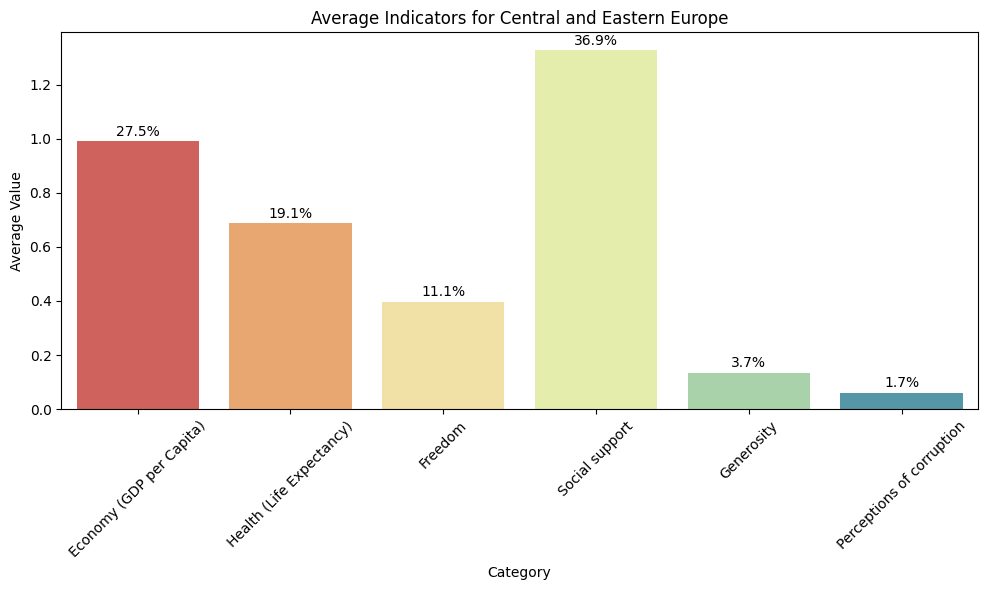

In [22]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Central and Eastern Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Central and Eastern Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10- Average Indicators for Middle East and Northern Africa

C:\Users\User\AppData\Local\Temp\ipykernel_20636\1079830368.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


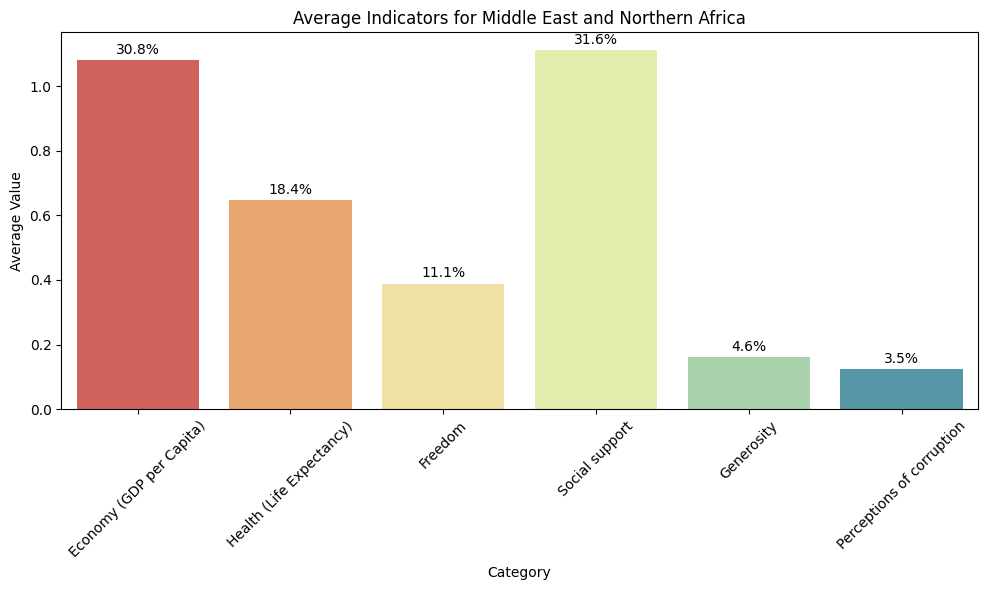

In [23]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Middle East and Northern Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Middle East and Northern Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11- Average Indicators for Southeastern Asia

C:\Users\User\AppData\Local\Temp\ipykernel_20636\1466704510.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


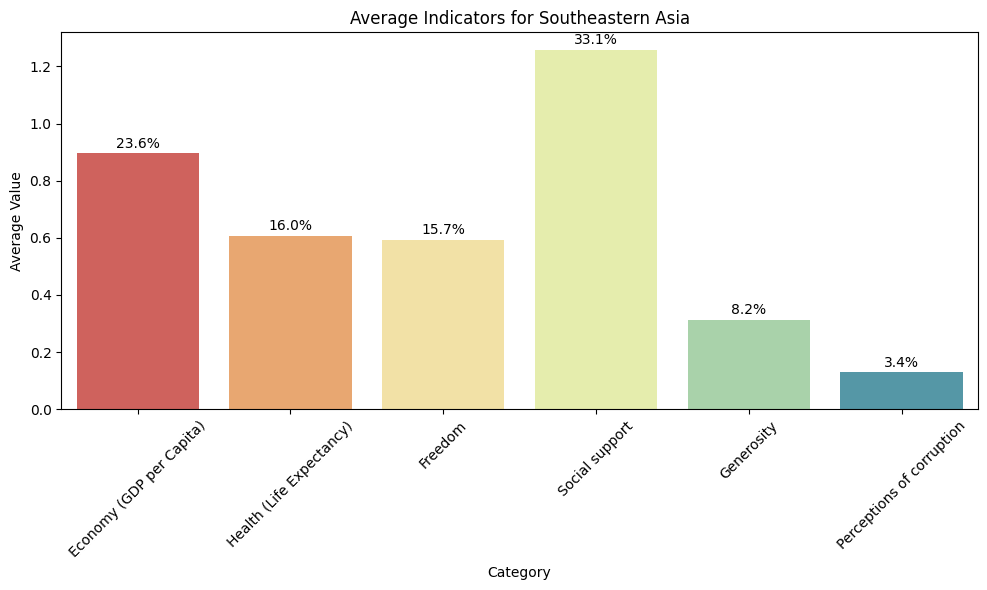

In [24]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Southeastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Southeastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12- Average Indicators for Eastern Asia

C:\Users\User\AppData\Local\Temp\ipykernel_20636\182130000.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


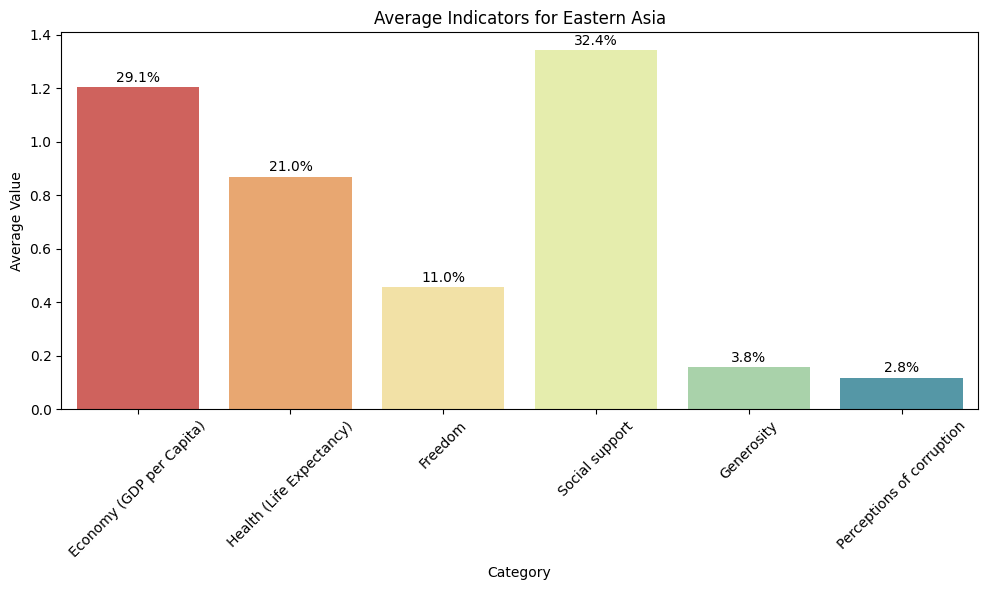

In [25]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Eastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Eastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

13- Average Indicators for Australia and New Zealand

C:\Users\User\AppData\Local\Temp\ipykernel_20636\3364369167.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


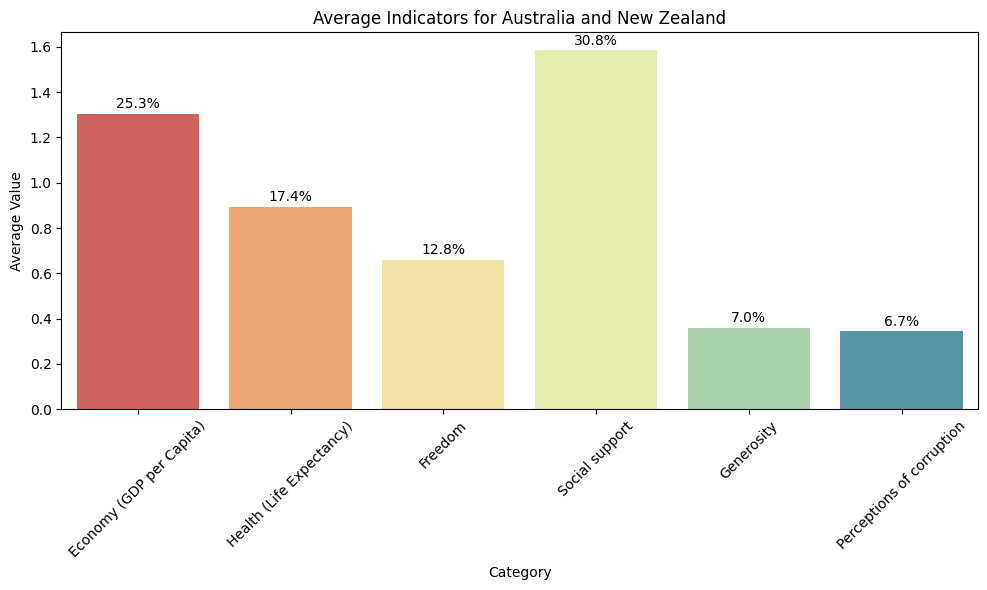

In [26]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Australia and New Zealand']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Australia and New Zealand')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14- Average Indicators for North America

C:\Users\User\AppData\Local\Temp\ipykernel_20636\203378025.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


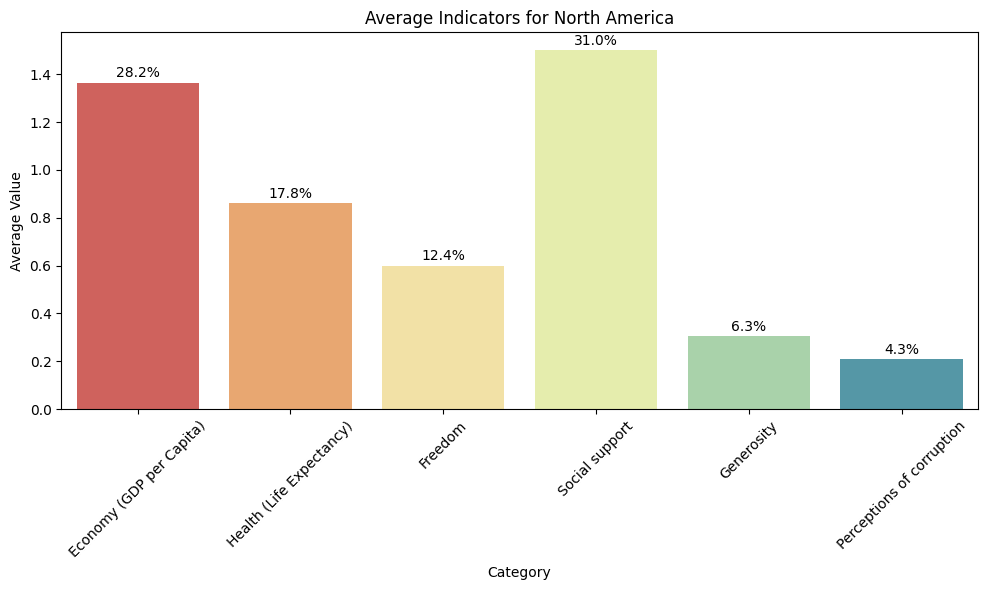

In [28]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'North America']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for North America')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15- Average Indicators for Sub-Saharan Africa

C:\Users\User\AppData\Local\Temp\ipykernel_20636\337641537.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


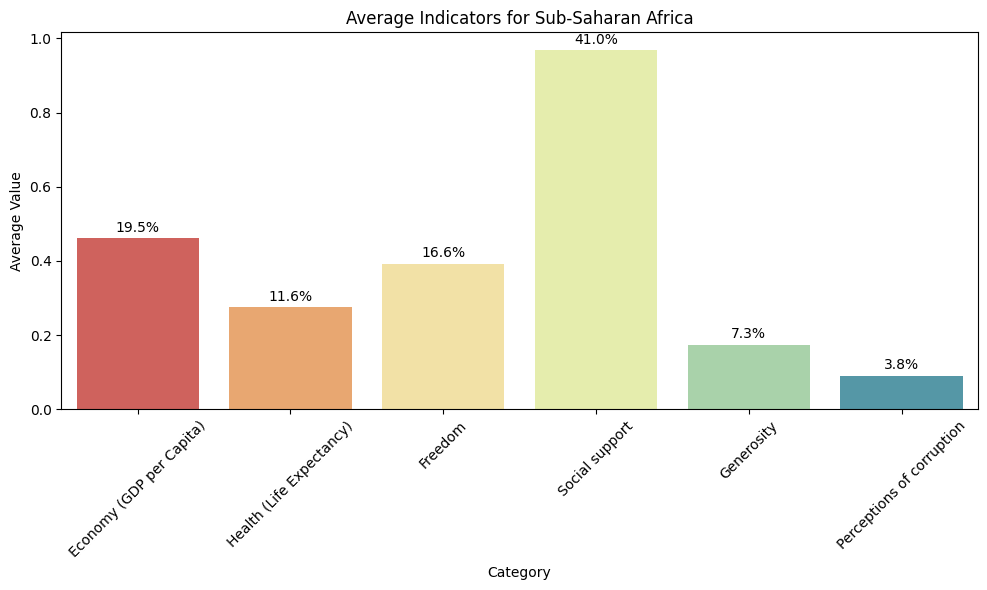

In [29]:
cols = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
latin = h18[h18['Region'] == 'Sub-Saharan Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Sub-Saharan Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16- Top 10 Countries by Economy % of Happiness Score

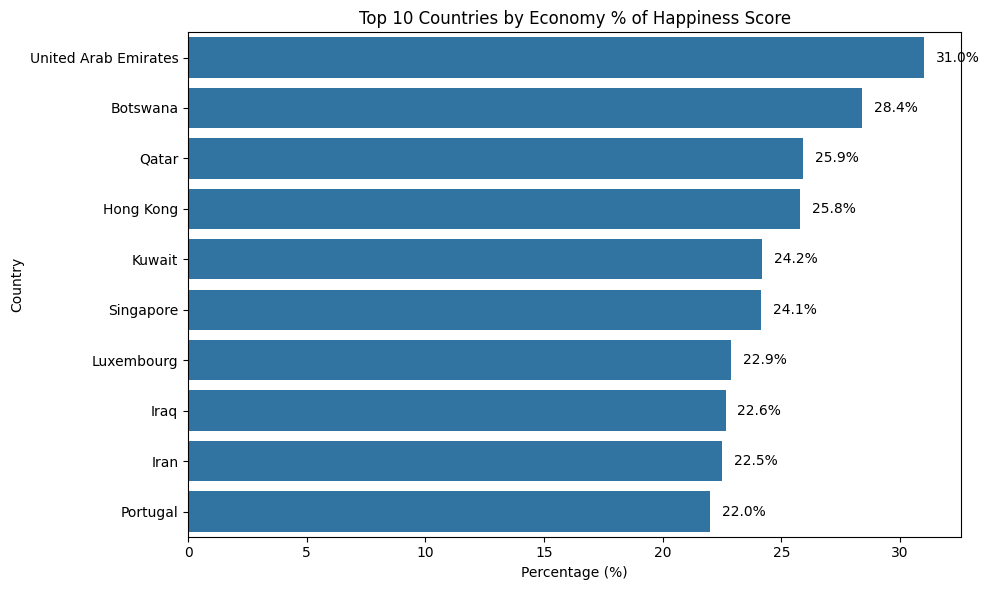

In [30]:
h16 = h18[h18['Happiness Score'] > 2].copy()

h16['Economy_pct'] = (h16['Economy (GDP per Capita)'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Economy_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Economy % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Economy_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

17- Top 10 Countries by Health % of Happiness Score

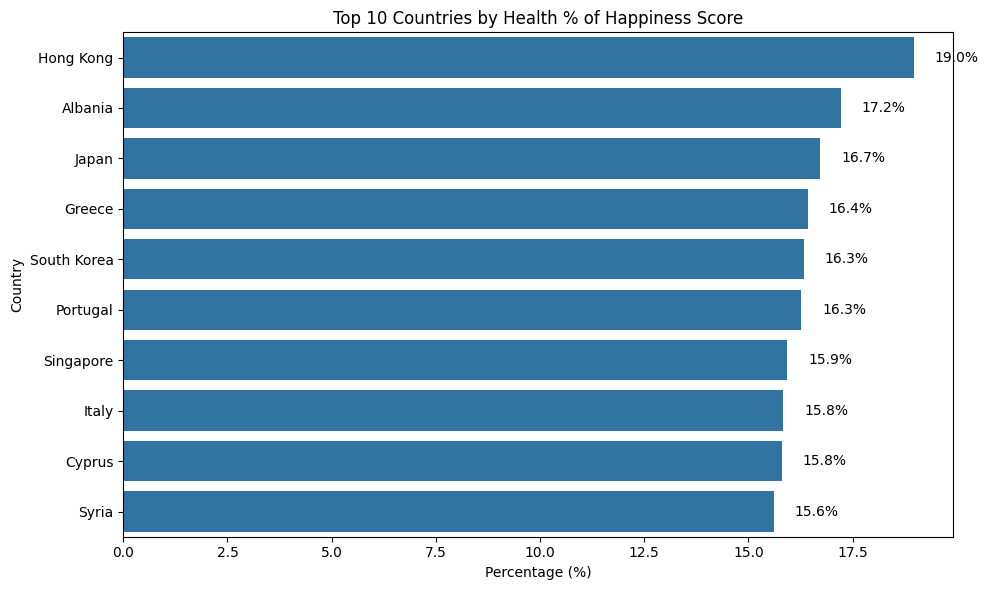

In [32]:
h18['Health_pct'] = (h18['Health (Life Expectancy)'] / h18['Happiness Score']) * 100
top10 = h18.sort_values(by='Health_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Health % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Health_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

18- Top 10 Countries by Freedom % of Happiness Score

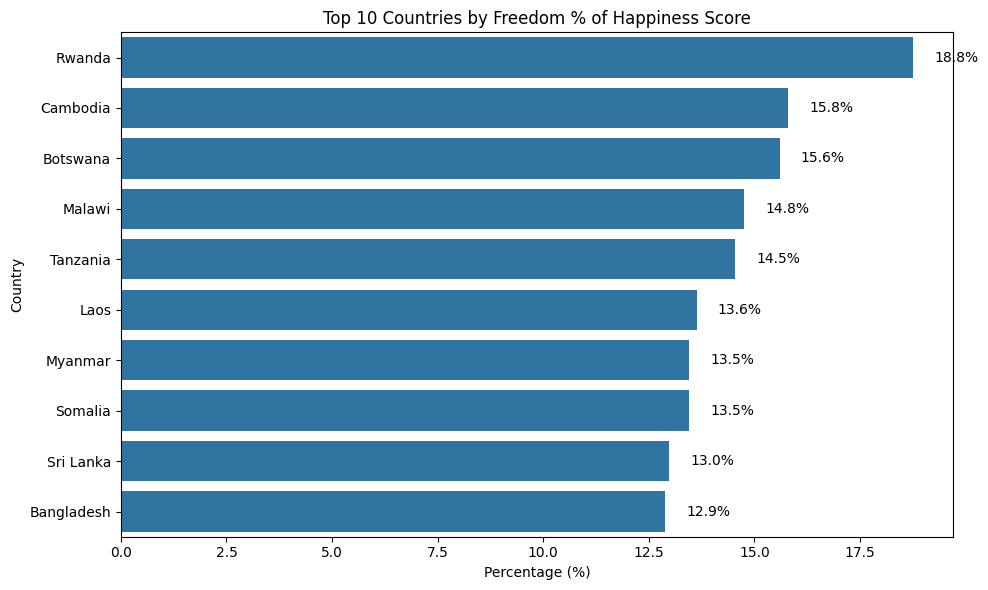

In [33]:
h18['Freedom_pct'] = (h18['Freedom'] / h18['Happiness Score']) * 100
top10 = h18.sort_values(by='Freedom_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Freedom % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Freedom_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

19- Top 10 Countries by Social support % of Happiness Score

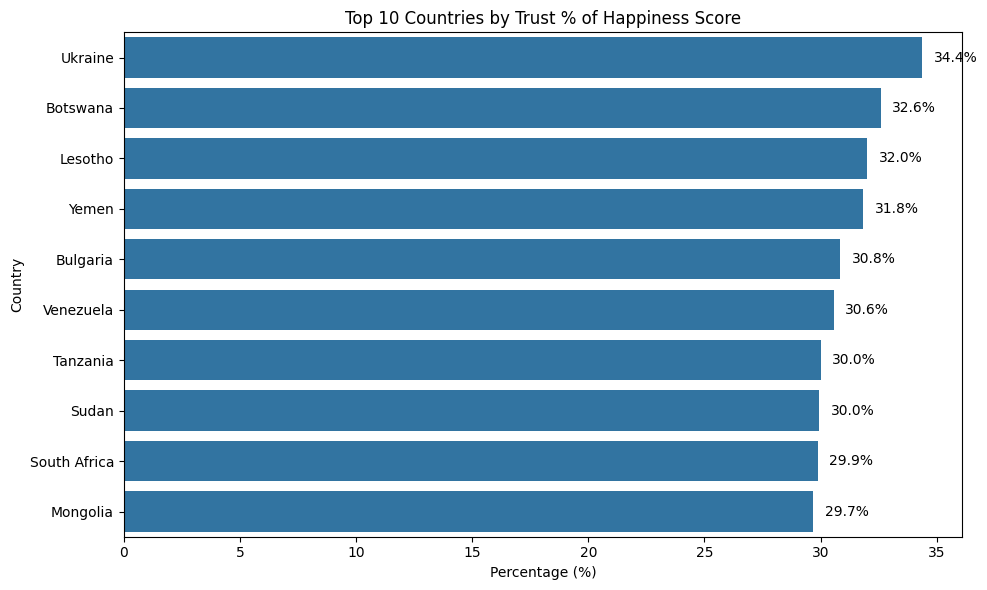

In [35]:
h18['Social support_pct'] = (h18['Social support'] / h18['Happiness Score']) * 100
top10 = h18.sort_values(by='Social support_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Social support_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Trust % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Social support_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

20- Top 10 Countries by Generosity % of Happiness Score

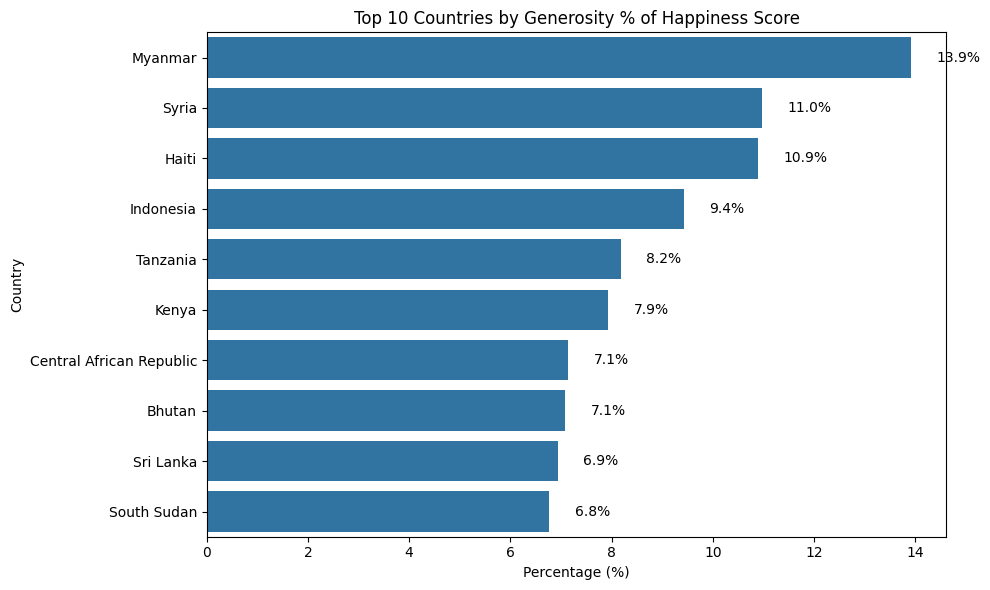

In [36]:
h18['Generosity_pct'] = (h18['Generosity'] / h18['Happiness Score']) * 100
top10 = h18.sort_values(by='Generosity_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Generosity % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Generosity_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

21-  Top 10 Countries by Dystopia Residual % of Happiness Score

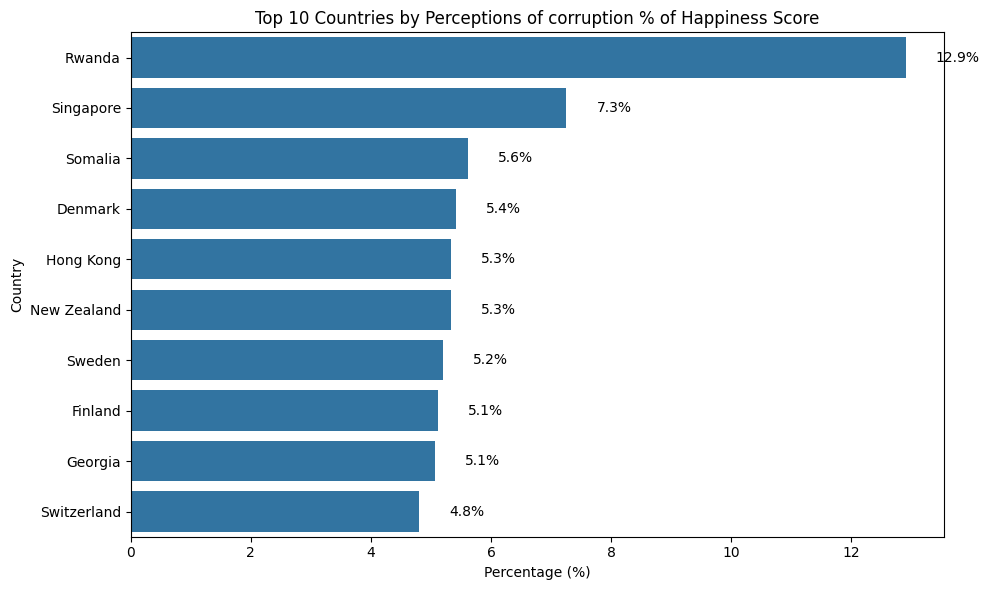

In [37]:
h18['Perceptions of corruption_pct'] = (h18['Perceptions of corruption'] / h18['Happiness Score']) * 100
top10 = h18.sort_values(by='Perceptions of corruption_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Perceptions of corruption_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Perceptions of corruption % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Perceptions of corruption_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

22- Top 10 Countries by Economy (GDP per Capita)

C:\Users\User\AppData\Local\Temp\ipykernel_20636\627026915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy (GDP per Capita)', y='Country', data=top_10, palette='crest')


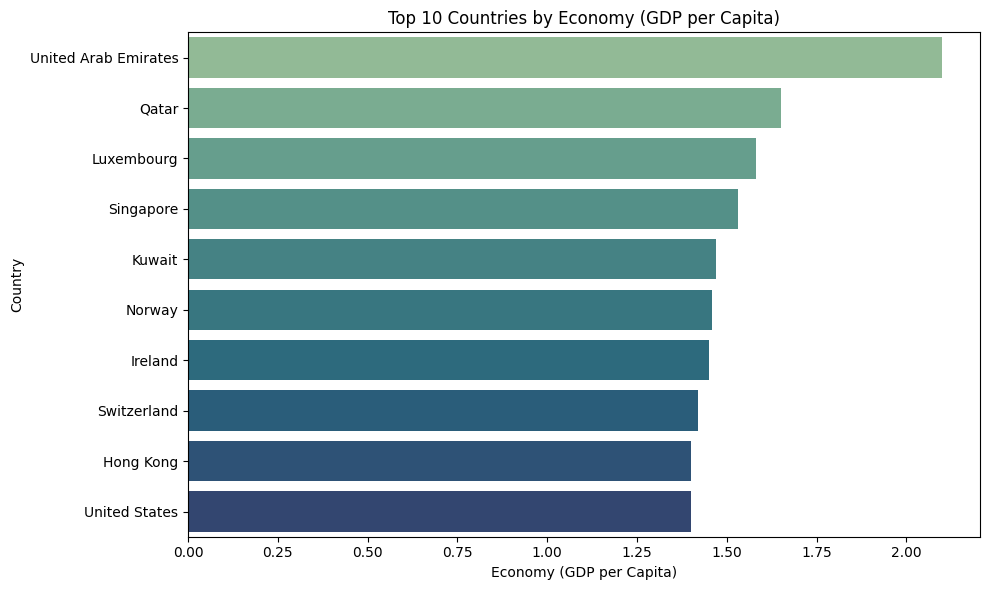

In [38]:
top_10 = h18[['Country', 'Economy (GDP per Capita)']].sort_values(by='Economy (GDP per Capita)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy (GDP per Capita)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

23- Top 10 Countries by Health (Life Expectancy)

C:\Users\User\AppData\Local\Temp\ipykernel_20636\2491560633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health (Life Expectancy)', y='Country', data=top_10, palette='crest')


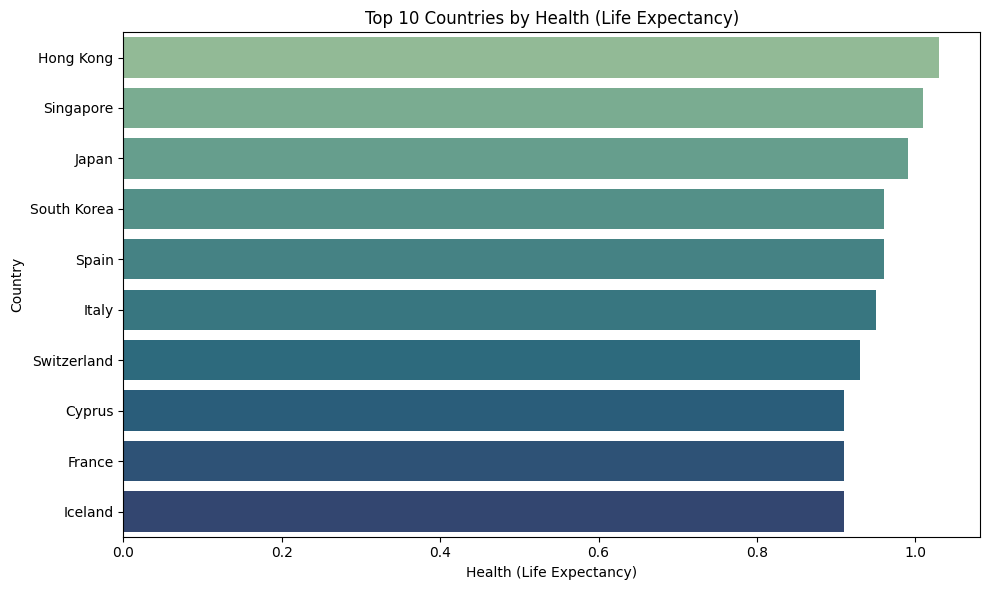

In [39]:
top_10 = h18[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health (Life Expectancy)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


24- Top 10 Countries by Freedom

C:\Users\User\AppData\Local\Temp\ipykernel_20636\3852238990.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')


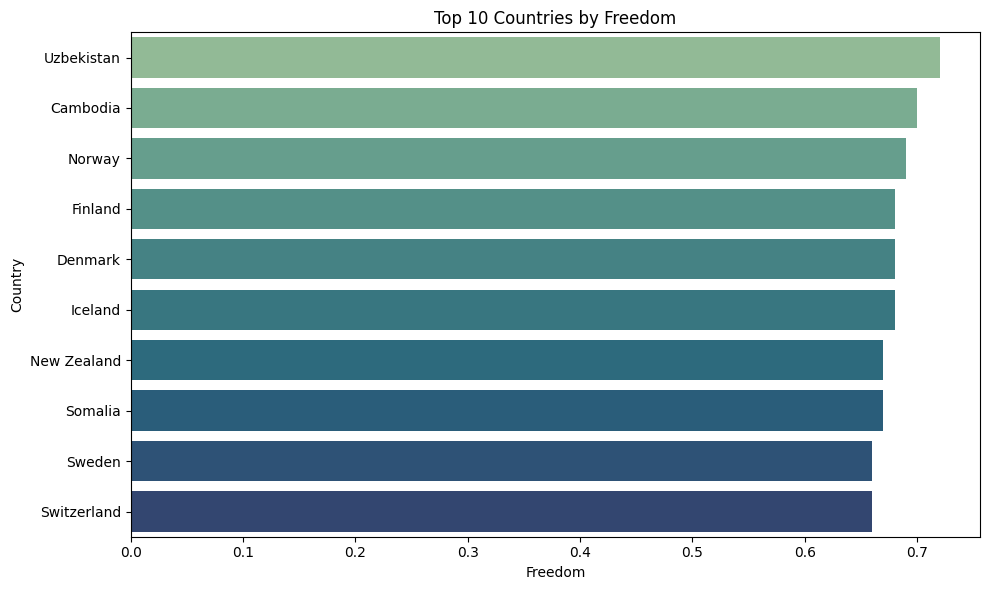

In [40]:
top_10 = h18[['Country', 'Freedom']].sort_values(by='Freedom', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Freedom')
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


25- Top 10 Countries by Social support

C:\Users\User\AppData\Local\Temp\ipykernel_20636\36406683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Social support', y='Country', data=top_10, palette='crest')


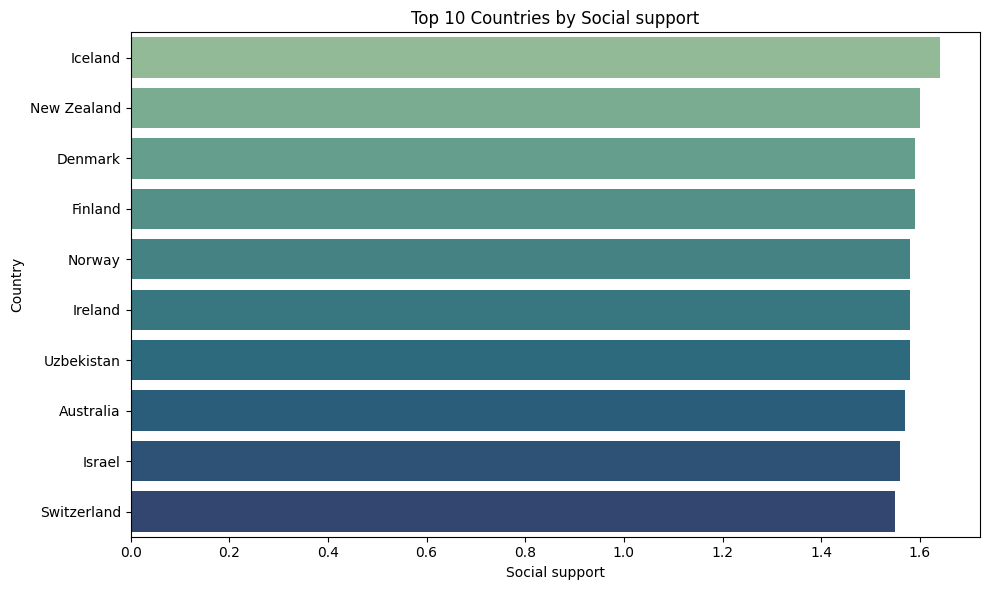

In [42]:
top_10 = h18[['Country', 'Social support']].sort_values(by='Social support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Social support', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Social support')
plt.xlabel('Social support')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

26- Top 10 Countries by Generosity

C:\Users\User\AppData\Local\Temp\ipykernel_20636\2789618575.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')


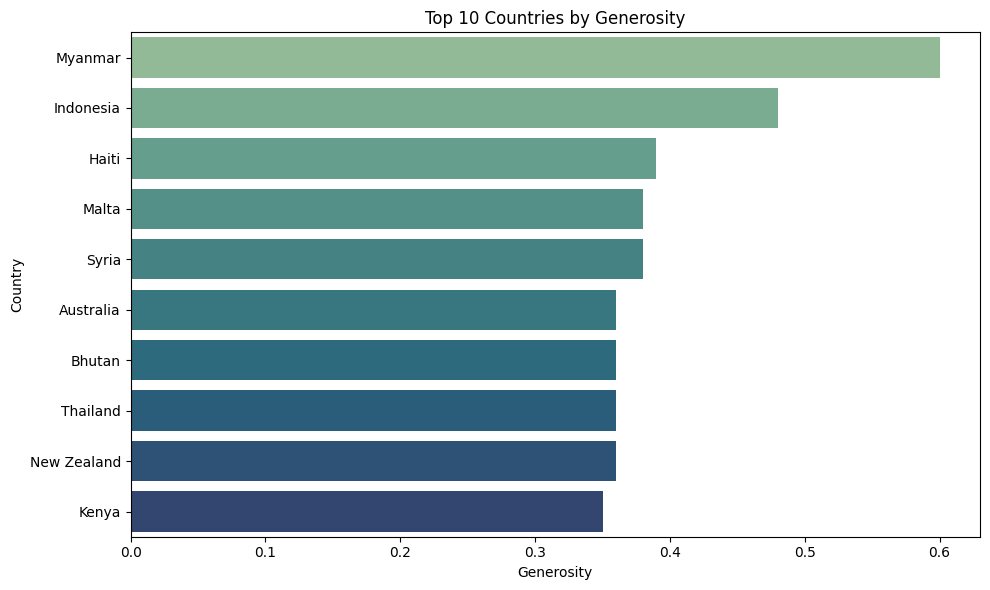

In [41]:
top_10 = h18[['Country', 'Generosity']].sort_values(by='Generosity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Generosity')
plt.xlabel('Generosity')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


27- Top 10 Countries by Perceptions of corruption

C:\Users\User\AppData\Local\Temp\ipykernel_20636\899220952.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perceptions of corruption', y='Country', data=top_10, palette='crest')


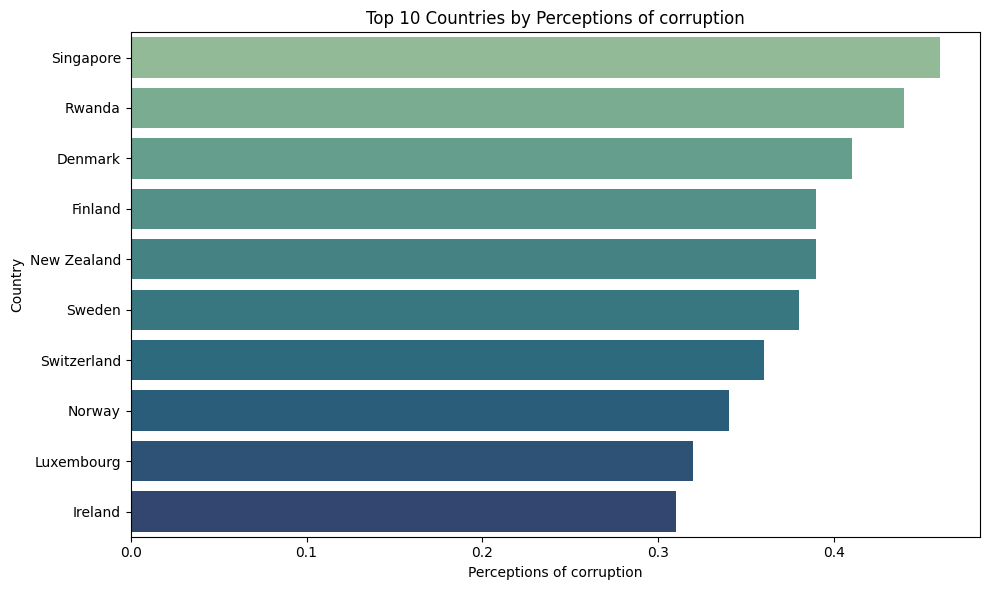

In [43]:
top_10 = h18[['Country', 'Perceptions of corruption']].sort_values(by='Perceptions of corruption', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Perceptions of corruption', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Perceptions of corruption')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


28- Top Region per Feature (Absolute Values)

C:\Users\User\AppData\Local\Temp\ipykernel_20636\1370657770.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')


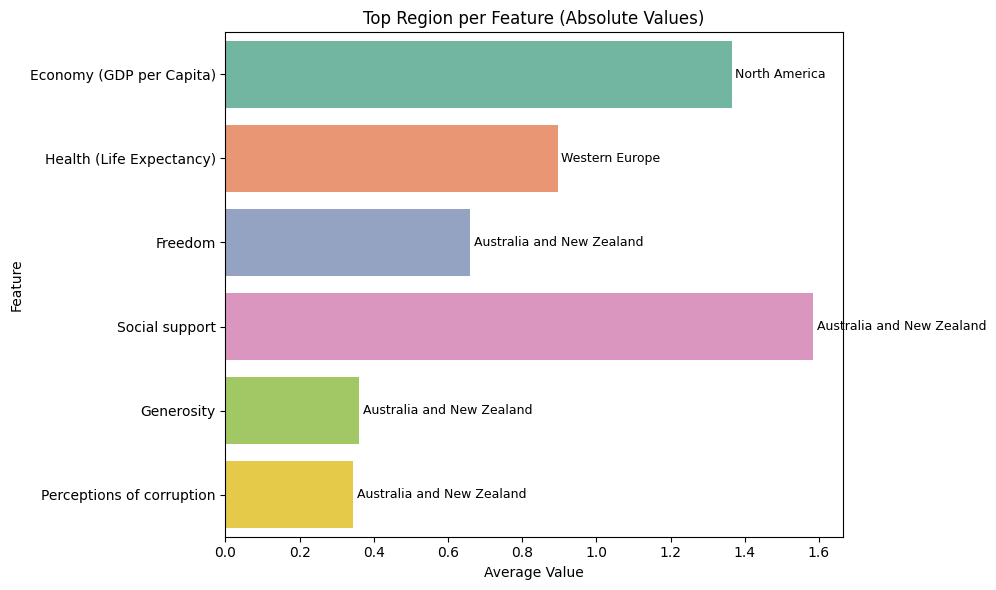

In [44]:
features = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
data = h18[['Region'] + features].dropna()
top_regions_abs = []
for feature in features:
    region_avg = data.groupby('Region')[feature].mean()
    top_region = region_avg.idxmax()
    top_value = region_avg.max()
    top_regions_abs.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_abs = pd.DataFrame(top_regions_abs)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')
for i, row in df_abs.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (Absolute Values)')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


29- Top Region per Feature (as % of Happiness Score)

C:\Users\User\AppData\Local\Temp\ipykernel_20636\24940278.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')


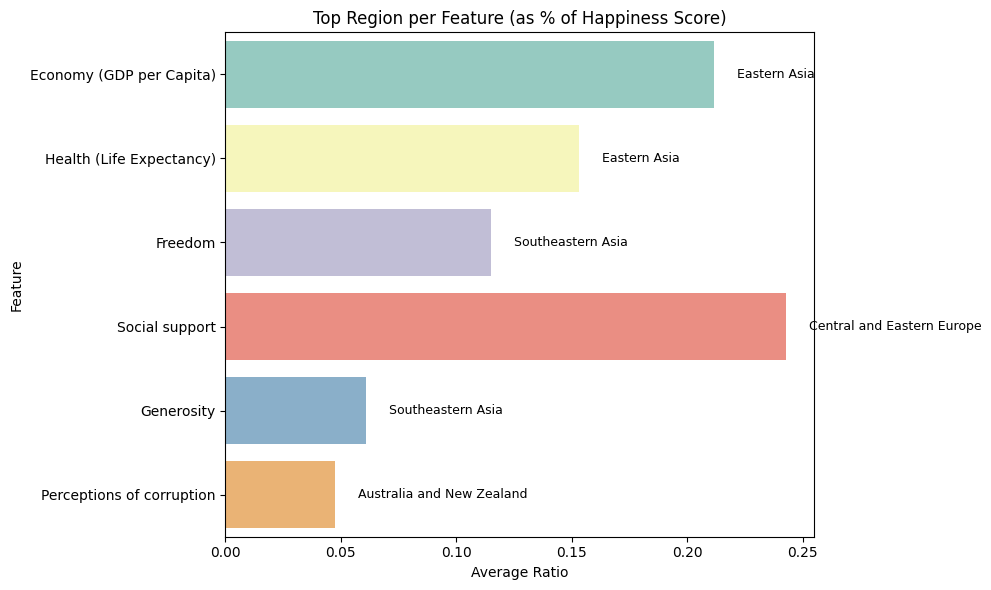

In [45]:
features = ['Economy (GDP per Capita)',  'Health (Life Expectancy)',
        'Freedom', 'Social support', 'Generosity', 'Perceptions of corruption']
data = h18[['Region', 'Happiness Score'] + features].dropna()
top_regions_ratio = []
for feature in features:
    data['Ratio'] = data[feature] / data['Happiness Score']
    region_avg_ratio = data.groupby('Region')['Ratio'].mean()
    top_region = region_avg_ratio.idxmax()
    top_value = region_avg_ratio.max()
    top_regions_ratio.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_ratio = pd.DataFrame(top_regions_ratio)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')
for i, row in df_ratio.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (as % of Happiness Score)')
plt.xlabel('Average Ratio')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
